# 1. 주식데이터 시각화

!pip install pandas_datareader
!pip install mplfinance 

# 2. 주식데이터 시각화

In [11]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import mpl_finance as matfin
import matplotlib.ticker as ticker

def visualize_stock(start_date, end_date, stock_code):
    stock = web.DataReader(stock_code + ".KS", "yahoo", start_date, end_date)
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)

    day_list = []
    name_list = []
    for i, day in enumerate(stock.index):
        if day.dayofweek == 0:
            day_list.append(i)
            name_list.append(day.strftime('%Y-%m-%d') + '(Mon)')

    ax.xaxis.set_major_locator(ticker.FixedLocator(day_list))
    ax.xaxis.set_major_formatter(ticker.FixedFormatter(name_list))

    matfin.candlestick2_ohlc(ax, stock['Open'], stock['High'], stock['Low'], stock['Close'], width=0.5, colorup='r', colordown='b')
    plt.grid()
    plt.show()

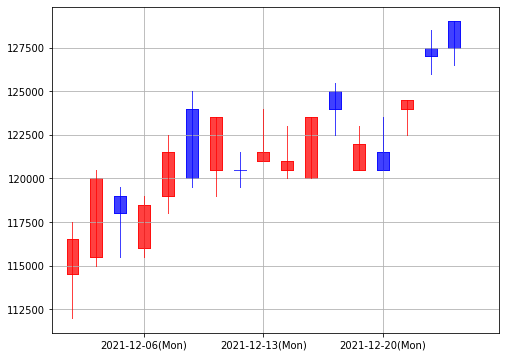

In [12]:
stock_code = "000660"
start_date = datetime.datetime(2021, 12, 1)
end_date = datetime.datetime(2021, 12, 31)

visualize_stock(start_date, end_date, stock_code)